In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线形图

## 线形图

In [3]:
# 线形图反映趋势
s = Series(data = np.random.randint(0, 10, size = 10))
s

0    7
1    9
2    5
3    8
4    2
5    5
6    8
7    3
8    4
9    0
dtype: int32

简单的Series图表示例,plot()

<AxesSubplot:>

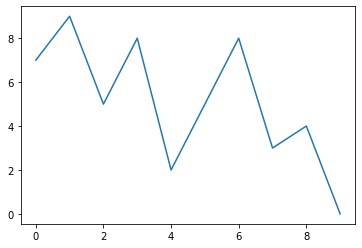

In [4]:
s.plot()

简单的DataFrame图表示例,plot()

- 图例的位置可能会随着数据的不同而不同

In [5]:
index = ['张三', '李四', '王五', '赵六']
columns = ['语文', '数学', '英语', 'Python']
data = np.random.randint(0, 150, size=(4, 4))
df = DataFrame(data = data, index=index, columns=columns)
df

,语文,数学,英语,Python
张三,63,59,32,43
李四,103,34,98,47
王五,44,144,33,147
赵六,128,53,1,148


<AxesSubplot:>

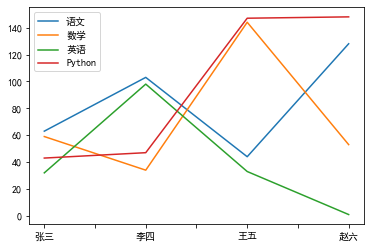

In [50]:
# matplotlib默认不是中文字体, 中文字体显示不了
# dataframe画图, 一列就是一条曲线
df.plot()

In [49]:
# 让matplotlib显示中文
# 改中文字体
plt.rcParams['font.sans-serif'] = 'SimHei'
# 中文字体下,负号不能正常显示
plt.rcParams['axes.unicode_minus'] = False

## 柱状图

In [ ]:
# 比大小画柱状图.

Series柱状图示例,kind = 'bar'/'barh'

<AxesSubplot:>

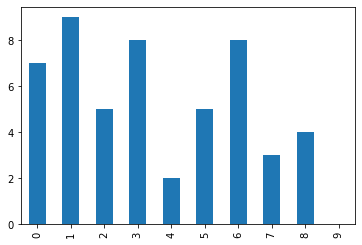

In [10]:
s.plot(kind='bar')

DataFrame柱状图示例

<AxesSubplot:>

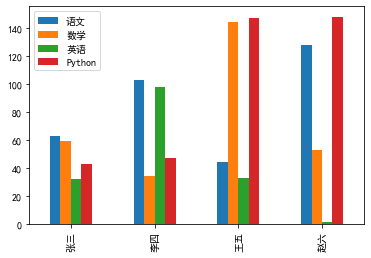

In [51]:
df.plot(kind='bar')

读取文件tips.csv，查看每天的聚会人数情况
每天各种聚会规模的比例  

求和并df.sum()，注意灵活使用axis

In [12]:
tips = pd.read_csv('../data/tips.csv')
tips                 

,day,1,2,3,4,5,6
0,Fri,1,16,1,1,0,0
1,Stat,2,53,18,13,1,0
2,Sun,0,39,15,18,3,1
3,Thur,1,48,4,5,1,3


In [20]:
tips.set_index(keys='day', inplace=True)

KeyError: "None of ['day'] are in the columns"

In [21]:
tips

,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Stat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<AxesSubplot:xlabel='day'>

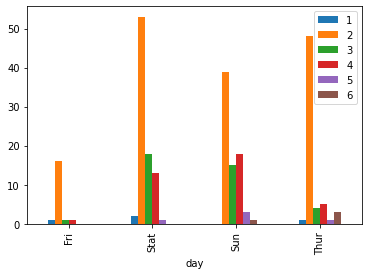

In [17]:
tips.plot(kind='bar')

In [34]:
s1 = tips.sum(axis=1)
s1

day
Fri     19
Stat    87
Sun     76
Thur    62
dtype: int64

In [45]:
t = tips.stack().unstack(level=0)

In [46]:
z = t / s1

In [47]:
z = z.stack().unstack(level=0)

<AxesSubplot:xlabel='day'>

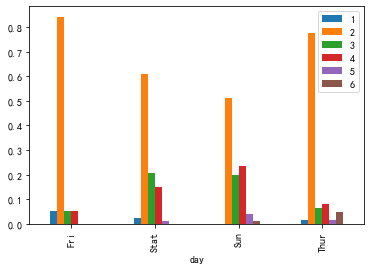

In [54]:
z.plot(kind='bar')

<AxesSubplot:xlabel='day'>

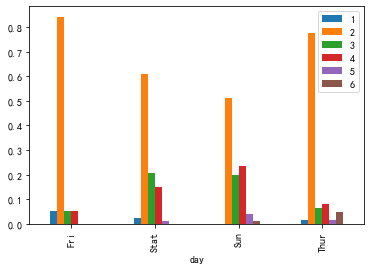

In [55]:
tips.div(s1, axis='index').plot(kind='bar')

## 直方图

In [2]:
# 直方图看分布
s = Series(np.array([1, 2, 2, 3, 4, 5, 5, 6, 8, 8]))
s

0    1
1    2
2    2
3    3
4    4
5    5
6    5
7    6
8    8
9    8
dtype: int32

<AxesSubplot:ylabel='Density'>

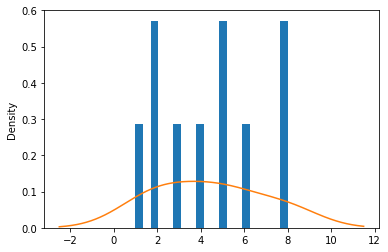

In [7]:
# 直方图histogram
# 默认的直方图表示x轴数据出现的次数
# 加上density=True, 变成密度, x轴数据出现的概率 / 组距
s.plot(kind='hist', bins=20, density=True)
# kde kernel denstiy estimation 核密度估计
s.plot(kind='kde')

In [5]:
# np.hitogram计算直方数据
# 返回次数和组距
np.histogram(s, bins=20)

(array([1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2],
       dtype=int64),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]))

rondom生成随机数百分比直方图，调用hist方法

- 柱高表示数据的频数，柱宽表示各组数据的组距
- 参数bins可以设置直方图方柱的个数上限，越大柱宽越小，数据分组越细致
- 设置density参数为True，可以把频数转换为概率

kde图：核密度估计，用于弥补直方图由于参数bins设置的不合理导致的精度缺失问题

#### 练习

绘制一个由两个不同的标准正态分布组成的的双峰分布

In [10]:
n1 = np.random.normal(loc=10, scale=3, size=1000)
n2 = np.random.normal(loc=30, scale=6, size=1000)
n3 = np.hstack((n1,n2))

In [11]:
s = Series(data=n3)

<AxesSubplot:ylabel='Density'>

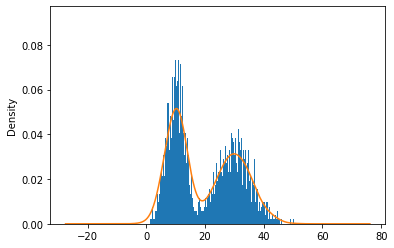

In [12]:
s.plot(kind='hist', bins=200, density=True)
s.plot(kind='kde')

## 散布图

散布图
散布图是观察两个一维数据数列之间的关系的有效方法,DataFrame对象可用 

使用方法：
设置kind = 'scatter'，给明标签columns

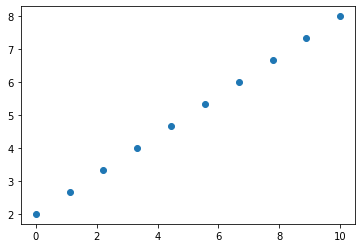

In [13]:
x = np.linspace(0, 10, num=10)
y = np.linspace(2, 8, num=10)
# 问x,y会形成什么关系
plt.scatter(x, y)

In [14]:
df = DataFrame({'A': x, 'B': y})
df

,A,B
0,0.000000,2.000000
1,1.111111,2.666667
2,2.222222,3.333333
3,3.333333,4.000000
4,4.444444,4.666667
5,5.555556,5.333333
6,6.666667,6.000000
7,7.777778,6.666667
8,8.888889,7.333333
9,10.000000,8.000000


<AxesSubplot:xlabel='A', ylabel='B'>

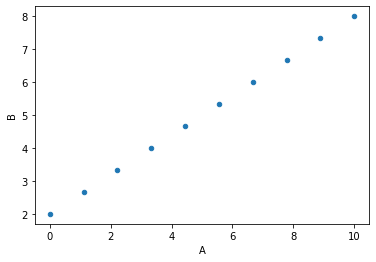

In [15]:
df.plot(x='A', y='B', kind='scatter')

散布图矩阵，当有多个点时，两两点的关系  

使用函数：pd.plotting.scatter_matrix(),
- 参数diagnol：设置对角线的图像类型

In [16]:
df = DataFrame({'A': np.random.randn(200), 'B': np.random.randn(200), 'C': np.random.randn(200), 'D': np.random.randn(200)})
df

,A,B,C,D
0,0.327997,-1.058897,-0.056111,0.837339
1,-0.914075,-1.349411,1.085522,0.478108
2,-0.782357,-0.467915,-0.256069,0.447606
3,-1.406538,1.758779,0.630551,0.236289
4,-0.258636,-1.412395,0.020411,0.532852
...,...,...,...,...
195,-0.873340,0.507610,0.790242,-0.419865
196,1.096013,1.477529,-1.736490,0.481155
197,-1.510797,-1.620998,-1.352471,0.221067
198,3.587552,-2.477794,-0.093162,-0.418534


<AxesSubplot:xlabel='A', ylabel='B'>

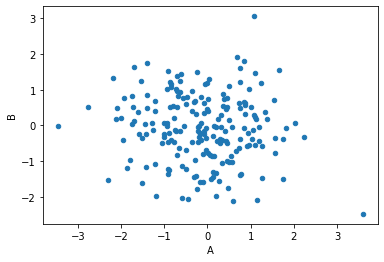

In [17]:
df.plot(x='A', y='B', kind='scatter')

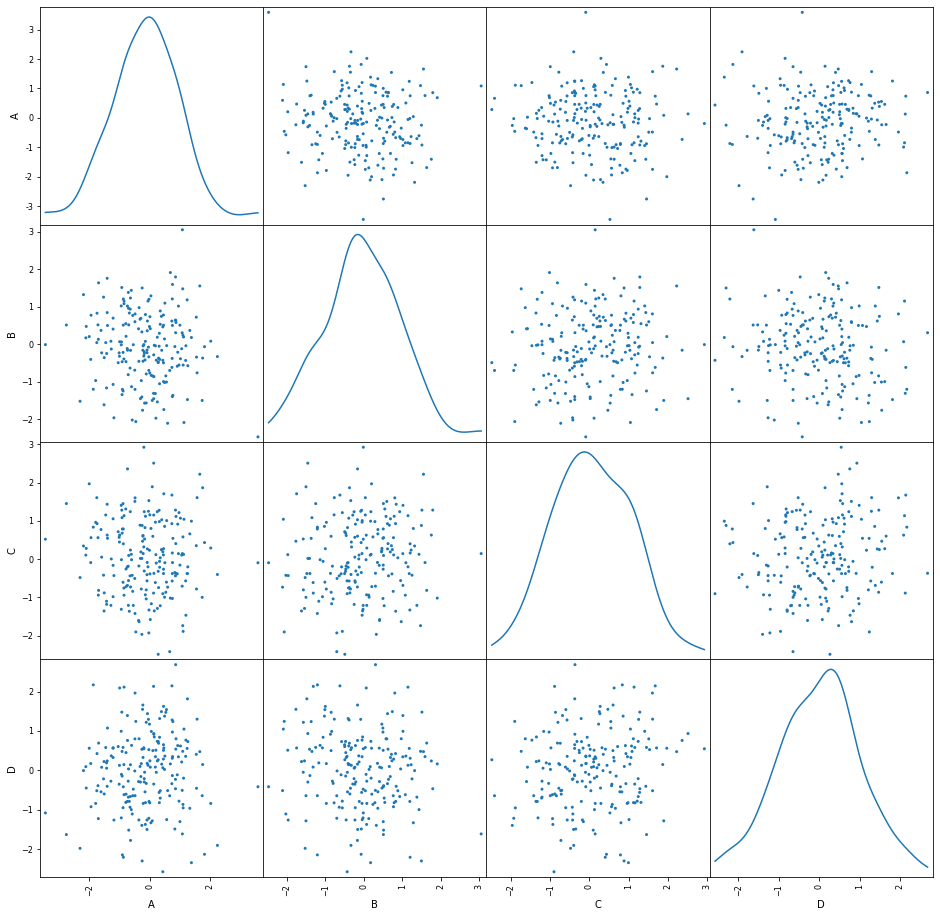

In [18]:
_ = pd.plotting.scatter_matrix(df, figsize=(16, 16), alpha=1, diagonal='kde')